In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'



# Part I: Import Three Datasets

In [2]:
# Load Dataset 1

filename = 'winequality-red.csv'
data1 = pd.read_csv(filename,delimiter = ';')

# Let the quality value larger than 5 to be 1, quality value less than 5 to be -1.
data1.quality.loc[(data1['quality'] > 5)] = 1
data1.quality.loc[(data1['quality'] != 1)] = -1
print(data1.shape)
data1.head(5)

(1599, 12)


/Users/ziwenzeng/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,-1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,-1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1


In [3]:
# Normalize dataframe by each columns
data1['fixed acidity']=((data1['fixed acidity']-data1['fixed acidity'].min())/(data1['fixed acidity'].max()-data1['fixed acidity'].min()))
data1['volatile acidity']=((data1['volatile acidity']-data1['volatile acidity'].min())/(data1['volatile acidity'].max()-data1['volatile acidity'].min()))
data1['citric acid']=((data1['citric acid']-data1['citric acid'].min())/(data1['citric acid'].max()-data1['citric acid'].min()))
data1['residual sugar']=((data1['residual sugar']-data1['residual sugar'].min())/(data1['residual sugar'].max()-data1['residual sugar'].min()))
data1['chlorides']=((data1['chlorides']-data1['chlorides'].min())/(data1['chlorides'].max()-data1['chlorides'].min()))
data1['free sulfur dioxide']=((data1['free sulfur dioxide']-data1['free sulfur dioxide'].min())/(data1['free sulfur dioxide'].max()-data1['free sulfur dioxide'].min()))
data1['total sulfur dioxide']=((data1['total sulfur dioxide']-data1['total sulfur dioxide'].min())/(data1['total sulfur dioxide'].max()-data1['total sulfur dioxide'].min()))
data1['density']=((data1['density']-data1['density'].min())/(data1['density'].max()-data1['density'].min()))
data1['pH']=((data1['pH']-data1['pH'].min())/(data1['pH'].max()-data1['pH'].min()))
data1['sulphates']=((data1['sulphates']-data1['sulphates'].min())/(data1['sulphates'].max()-data1['sulphates'].min()))
data1['alcohol']=((data1['alcohol']-data1['alcohol'].min())/(data1['alcohol'].max()-data1['alcohol'].min()))

data1.head(5)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,-1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,-1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,-1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,-1


In [4]:
# TRY normalize the whole dataframe: data1
filename = 'winequality-red.csv'
data1 = pd.read_csv(filename,delimiter = ';')

data1.quality.loc[(data1['quality'] > 5)] = 1
data1.quality.loc[(data1['quality'] != 1)] = -1
data1=((data1-data1.min())/(data1.max()-data1.min()))
# data1

/Users/ziwenzeng/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
# Load Dataset 3: Predict the Iris Category

filename = 'iris.data'
data3 = pd.read_csv(filename)

# Rename thee columns
data3.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']

# Let class = Iris-setosa to be 1, let the class that is not Iris-setosa to be -1
data3 = data3.replace({'class':'Iris-setosa'}, 1)
data3 = data3.replace({'class':'Iris-virginica'}, -1)
data3 = data3.replace({'class':'Iris-versicolor'}, -1)

print(data3.shape)
data3.head(5)

(149, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,1
1,4.7,3.2,1.3,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,5.4,3.9,1.7,0.4,1


In [7]:
# Load Dataset 4: Car Evaluation

filename = 'car.data'
data4 = pd.read_csv(filename)
data4.columns = ['Buying','Maintenance_price','Doors','Person','Lug_boot','Safety','Acceptability']

# Data Cleaning: make sure 'Door' and 'Person" all use integer values
data4.Doors.loc[(data4['Doors'] == '5more' )] = 7
data4.Person.loc[(data4['Person'] == 'more' )] = 7

# Data Cleaning: convert car acceptability to -1 when it's 'unacceptible' and 'acceptiable', +1 when it's 'good' and 'very good'.  
data4.Acceptability.loc[(data4['Acceptability'] == 'unacc' )] = -1
data4.Acceptability.loc[(data4['Acceptability'] == 'acc' )] = -1
data4.Acceptability.loc[(data4['Acceptability'] == 'good' )] = +1
data4.Acceptability.loc[(data4['Acceptability'] == 'vgood' )] = +1

# One-hot Encoding on 'buying','lug_boot', 'maintenance','safety'
buying = pd.get_dummies(data4['Buying'],prefix=['Buying'])
maintenance = pd.get_dummies(data4['Maintenance_price'],prefix = ['Maintenance_price'])
lug = pd.get_dummies(data4['Lug_boot'],prefix = ['Lug_boot'])
safety = pd.get_dummies(data4['Safety'],prefix = ['Safety'])

data4 = pd.concat([data4,buying,maintenance,lug,safety],axis = 1)
data4 = data4.drop(['Buying','Maintenance_price','Lug_boot','Safety'],axis = 1)

# Put the predicted part ('area') to the last column
Acceptability = data4['Acceptability']
data4.drop(labels = ['Acceptability'],axis = 1, inplace = True)
data4.insert(16,'Acceptability',Acceptability)
data4.head(5)
# print(data4.shape)



,Doors,Person,['Buying']_high,['Buying']_low,['Buying']_med,['Buying']_vhigh,['Maintenance_price']_high,['Maintenance_price']_low,['Maintenance_price']_med,['Maintenance_price']_vhigh,['Lug_boot']_big,['Lug_boot']_med,['Lug_boot']_small,['Safety']_high,['Safety']_low,['Safety']_med,Acceptability
0,2,2,0,0,0,1,0,0,0,1,0,0,1,0,0,1,-1
1,2,2,0,0,0,1,0,0,0,1,0,0,1,1,0,0,-1
2,2,2,0,0,0,1,0,0,0,1,0,1,0,0,1,0,-1
3,2,2,0,0,0,1,0,0,0,1,0,1,0,0,0,1,-1
4,2,2,0,0,0,1,0,0,0,1,0,1,0,1,0,0,-1


In [11]:
# Load Dataset 5: Census Income

filename = 'adult.data'
data5 = pd.read_csv(filename)


# Rename thee columns
data5.columns = ['age','workclass','fnlwgt','education','edu_num','marry_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours-per-week','native_country','income']

data5 = data5.drop(['fnlwgt','marry_status','hours-per-week','occupation','native_country','relationship','edu_num'], axis=1)

data5.drop(data5.loc[data5['workclass']==' ?'].index, inplace=True)

data5.income.loc[(data5['income'] == ' <=50K' )] = -1
data5.income.loc[(data5['income'] == ' >50K' )] = +1

# One-hot encoding for workclass and education
workclass = pd.get_dummies(data5['workclass'],prefix=['workclass'])
education = pd.get_dummies(data5['education'],prefix = ['education'])

race = pd.get_dummies(data5['race'],prefix = ['race'])
sex = pd.get_dummies(data5['sex'],prefix = ['sex'])


data5 = pd.concat([data5,workclass,education,race,sex],axis = 1)
data5 = data5.drop(['workclass','education','race','sex'],axis = 1)

# Put the predicted part ('area') to the last column
income = data5['income']
data5.drop(labels = ['income'],axis = 1, inplace = True)
data5.insert(34,'income',income)

data5 = data5.sample(n=7000)

# data5.reset_index()
data5.head(5)



/Users/ziwenzeng/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,age,capital_gain,capital_loss,['workclass']_ Federal-gov,['workclass']_ Local-gov,['workclass']_ Never-worked,['workclass']_ Private,['workclass']_ Self-emp-inc,['workclass']_ Self-emp-not-inc,['workclass']_ State-gov,...,['education']_ Prof-school,['education']_ Some-college,['race']_ Amer-Indian-Eskimo,['race']_ Asian-Pac-Islander,['race']_ Black,['race']_ Other,['race']_ White,['sex']_ Female,['sex']_ Male,income
17546,52,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,-1
22900,31,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,-1
16539,33,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,-1
27151,66,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,-1
331,47,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,-1


In [9]:
print(data5.loc[data5.income == 1, 'income'].count())
print(data5.loc[data5.income == -1, 'income'].count())

1757
5243


In [10]:
# Prepare three datasets:

#1) Convert dataframe into nparray
#2) shuffle the data

Data_1 = data1.values
# Data_2 = data2.values
Data_3 = data3.values
Data_4 = data4.values
Data_5 = data5.values

print(Data_1.shape)
# print(Data_2.shape)
print(Data_3.shape)
print(Data_4.shape)
print(Data_5.shape)

(1599, 12)
(149, 5)
(1727, 17)
(7000, 35)


# Part II: Define  Classifiers function

In [14]:
# One function to finish SVM classifier
def runSVM(Data,partition,C_list):
    np.random.shuffle(Data)
    X = Data[:, 0:-1]         # First column to second last column: Features (numerical values) 
    Y = Data[:, -1]           # Last column: Labels (0 or 1)

    X_train_val = X[:int(partition*len(X))] # Get features from train + val set.
    X_test      = X[int(partition*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(partition*len(Y))] # Get labels from train + val set.
    Y_test     = Y[int(partition*len(Y)):] # Get labels from test set.
    
    Y_train_val = Y_train_val.astype('int')
    Y_test = Y_test.astype('int')

    Kernel_list = ['linear','rbf']
    clf = SVC()
    
    # Define hyper-paramter C
    parameters = {'kernel': Kernel_list,'C':C_list}
    
    # Get best paramter by doing cross-validation through gridSearch
    classifier = GridSearchCV(clf,parameters,cv=3, return_train_score = True)
    classifier.fit(X_train_val,Y_train_val)

    # Find the training accuracy and validation accuracy corresponding to best paramter
    train_acc =  classifier.cv_results_['mean_train_score']
    best_train_acc = np.amax(train_acc) 
  
    val_acc = classifier.cv_results_['mean_test_score']
    best_val_acc = np.amax(val_acc) 
    
    # Get the best paramters
    Best_C = classifier.best_params_['C']
    Best_Kernel = classifier.best_params_['kernel']
    parameter = classifier.best_params_
    

    # Compute test accuracy based on best parameters
    clf = svm.SVC(C = Best_C,kernel = Best_Kernel)
    clf.fit(X_train_val,Y_train_val)
    test_acc = clf.score(X_test, Y_test)

    return parameter, best_train_acc, best_val_acc, test_acc

In [15]:
# Function to run on three trails and get average training, validation, and test accuracy

def SVM(Data,Partition,C_list):
    train_avg = 0
    val_avg = 0
    test_avg = 0

    for i in range(3):
        p, train_acc,val_acc, test_acc = runSVM(Data,Partition,C_list)
        best_p = p
        train_avg = train_avg + train_acc
        val_avg = val_avg + val_acc
        test_avg = test_avg + test_acc

        print("\n"+"Trial " + str(i+1))
        print("Best parameter: " + str(best_p))
        print("train accuracy is: " + str(train_acc))
        print("val accuracy is: " + str(val_acc))
        print("test accuracy is: " + str(test_acc))

    train_avg_svm = train_avg/3
    val_avg_svm = val_avg/3
    test_avg_svm = test_avg/3

    print("\n"+"Average train accuracy is: " + str(train_avg_svm))
    print("Average val accuracy is: " + str(val_avg_svm))
    print("Average test accuracy is: " + str(test_avg_svm))
    
    return train_avg_svm,val_avg_svm,test_avg_svm

In [16]:
# One function to finish Random Forest Classifier
def runRMF(Data,partition,estimator_list):
    # Initiate RamdomForestClassifier
    np.random.shuffle(Data)
    X = Data[:, 0:-1]         # First column to second last column: Features (numerical values) 
    Y = Data[:, -1]           # Last column: Labels (0 or 1)
    X_train_val = X[:int(partition*len(X))] # Get features from train + val set.
    X_test      = X[int(partition*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(partition*len(Y))] # Get labels from train + val set.
    Y_test     = Y[int(partition*len(Y)):] # Get labels from test set.
    
    Y_train_val = Y_train_val.astype('int')
    Y_test = Y_test.astype('int')
    
    clf = RandomForestClassifier()
    # Define max_features by the number of features in X_train_val
    
    length = len(X_train_val[0])
    features = []
    for i in range(length):
        features.append(i+1)
    
    # Define hyper-parameters to be criterion and n_estimator for cross-validation
    parameters = {'criterion':['entropy','gini'],'n_estimators': estimator_list,'max_features':features}
    # Use GrideSearch for cross-validation for hyper paramters
    
    classifier = GridSearchCV(clf, parameters,cv = 3, return_train_score = True)
    classifier.fit(X_train_val,Y_train_val)

    train_acc =  classifier.cv_results_['mean_train_score']
    best_train_acc = np.amax(train_acc) 
    
    val_acc = classifier.cv_results_['mean_test_score']
    best_val_acc = np.amax(val_acc)
    
    # Get the best paramters
    Best_criterion = classifier.best_params_['criterion']
    Best_n_estimators = classifier.best_params_['n_estimators']
    Best_max_features = classifier.best_params_['max_features']
    parameter = classifier.best_params_

    # Compute test accuracy based on best hyper-paramters
    clf = RandomForestClassifier(criterion = Best_criterion , n_estimators = Best_n_estimators, max_features = Best_max_features)
    clf.fit(X_train_val,Y_train_val)
    test_acc = clf.score(X_test, Y_test)
    
    return parameter, best_train_acc, best_val_acc, test_acc




In [17]:
# Function to run on three trails and get average training, validation, and test accuracy

def RMF(Data,Partition,n_estimator_list):
    train_avg = 0
    val_avg = 0
    test_avg = 0

    for i in range(3):
        p, train_acc,val_acc, test_acc = runRMF(Data,Partition,n_estimator_list)
        best_p = p
        train_avg = train_avg + train_acc
        val_avg = val_avg + val_acc
        test_avg = test_avg + test_acc

        print("\n"+"Trial " + str(i+1))
        print("Best parameter: " + str(best_p))
        print("train accuracy is: " + str(train_acc))
        print("val accuracy is: " + str(val_acc))
        print("test accuracy is: " + str(test_acc))

    train_avg_rmf = train_avg/3
    val_avg_rmf = val_avg/3
    test_avg_rmf = test_avg/3

    print("\n"+"Average train accuracy is: " + str(train_avg_rmf))
    print("Average val accuracy is: " + str(val_avg_rmf))
    print("Average test accuracy is: " + str(test_avg_rmf))
    
    return train_avg_rmf, val_avg_rmf,test_avg_rmf

In [18]:

def runKNN(Data,partition,K_list):

    np.random.shuffle(Data)

    X = Data[:, 0:-1]         # First column to second last column: Features (numerical values) 
    Y = Data[:, -1]           # Last column: Labels (0 or 1)
    X_train_val = X[:int(partition*len(X))] # Get features from train + val set.
    X_test      = X[int(partition*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(partition*len(Y))] # Get labels from train + val set.
    Y_test     = Y[int(partition*len(Y)):] # Get labels from test set.
    
    Y_train_val = Y_train_val.astype('int')
    Y_test = Y_test.astype('int')

    parameters = {'n_neighbors':K_list}
    clf = KNeighborsClassifier()
    
    # Get best paramter by doing cross-validation through gridSearch
    classifier = GridSearchCV(clf,parameters,cv=5, return_train_score = True)
    classifier.fit(X_train_val,Y_train_val)

    train_acc =  classifier.cv_results_['mean_train_score']
    best_train_acc = np.amax(train_acc) 
    
    val_acc = classifier.cv_results_['mean_test_score']
    best_val_acc = np.amax(val_acc)

    # Get the best paramters
    Best_N = classifier.best_params_['n_neighbors']
    parameter = classifier.best_params_

    # Compute test accuracy based on best hyper-paramters
    clf = KNeighborsClassifier(n_neighbors = Best_N)
    clf.fit(X_train_val,Y_train_val)
    test_acc = clf.score(X_test, Y_test)

    return parameter, best_train_acc, best_val_acc, test_acc




In [19]:
# Function to run on three trails and get average training, validation, and test accuracy

def KNN(Data,partition,K_list):
    train_avg = 0
    val_avg = 0
    test_avg = 0

    for i in range(3):
        p, train_acc,val_acc, test_acc = runKNN(Data,partition,K_list)
        best_p = p
        train_avg = train_avg + train_acc
        val_avg = val_avg + val_acc
        test_avg = test_avg + test_acc

        print("\n"+"Trial " + str(i+1))
        print("Best parameter: " + str(best_p))
        print("train accuracy is: " + str(train_acc))
        print("val accuracy is: " + str(val_acc))
        print("test accuracy is: " + str(test_acc))

    train_avg_knn = train_avg/3
    val_avg_knn = val_avg/3
    test_avg_knn = test_avg/3

    print("\n"+"Average train accuracy is: " + str(train_avg_knn))
    print("Average val accuracy is: " + str(val_avg_knn))
    print("Average test accuracy is: " + str(test_avg_knn))
    
    return train_avg_knn,val_avg_knn,test_avg_knn

In [20]:
# One function to run Adaboost classifier

def runADB(Data,partition,learning_rate,n_estimator_list):
    np.random.shuffle(Data)
    X = Data[:, 0:-1]         # First column to second last column: Features (numerical values) 
    Y = Data[:, -1]           # Last column: Labels (-1 or 1)
    X_train_val = X[:int(partition*len(X))] # Get features from train + val set.
    X_test      = X[int(partition*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(partition*len(Y))] # Get labels from train + val set.
    Y_test     = Y[int(partition*len(Y)):] # Get labels from test set.

  
    Y_train_val = Y_train_val.astype('int')
    Y_test = Y_test.astype('int')
    
    parameters = {'n_estimators': n_estimator_list,'learning_rate':learning_rate}
    # Use GrideSearch for cross-validation for hyper paramters
    
    clf = AdaBoostClassifier()
    classifier = GridSearchCV(clf, parameters,cv = 5, return_train_score = True)
    classifier.fit(X_train_val,Y_train_val)
    
     # Compute test accuracy based on best hyper-paramters
    train_acc =  classifier.cv_results_['mean_train_score']
    best_train_acc = np.amax(train_acc) 
    
    val_acc = classifier.cv_results_['mean_test_score']
    best_val_acc = np.amax(val_acc)
    
    # Get the best paramters
    Best_learning_rate = classifier.best_params_['learning_rate']
    Best_n_estimators = classifier.best_params_['n_estimators']
    parameter = classifier.best_params_
    
    clf = AdaBoostClassifier(learning_rate = Best_learning_rate , n_estimators = Best_n_estimators)
    clf.fit(X_train_val,Y_train_val)
    test_acc = clf.score(X_test, Y_test)
    
    return parameter, best_train_acc, best_val_acc, test_acc



In [21]:
# Function to run on three trails and get average training, validation, and test accuracy

def ADB(Data,partition,learning_rate,n_estimator_list):
    train_avg = 0
    val_avg = 0
    test_avg = 0

    for i in range(3):
        p, train_acc,val_acc, test_acc = runADB(Data,partition,learning_rate,n_estimator_list)
        best_p = p
        train_avg = train_avg + train_acc
        val_avg = val_avg + val_acc
        test_avg = test_avg + test_acc

        print("\n"+"Trial " + str(i+1))
        print("Best parameter: " + str(best_p))
        print("train accuracy is: " + str(train_acc))
        print("val accuracy is: " + str(val_acc))
        print("test accuracy is: " + str(test_acc))

    train_avg_adb = train_avg/3
    val_avg_adb = val_avg/3
    test_avg_adb = test_avg/3

    print("\n"+"Average train accuracy is: " + str(train_avg_adb))
    print("Average val accuracy is: " + str(val_avg_adb))
    print("Average test accuracy is: " + str(test_avg_adb))
    
    return train_avg_adb,val_avg_adb,test_avg_adb

In [22]:
# One function to run Logistic Regression Classifier

def runLOG(Data,partition,C_list):

    np.random.shuffle(Data)

    X = Data[:, 0:-1]         # First column to second last column: Features (numerical values) 
    Y = Data[:, -1]           # Last column: Labels (-1 or 1)
    X_train_val = X[:int(partition*len(X))] # Get features from train + val set.
    X_test      = X[int(partition*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(partition*len(Y))] # Get labels from train + val set.
    Y_test     = Y[int(partition*len(Y)):] # Get labels from test set.
    
    Y_train_val = Y_train_val.astype('int')
    Y_test = Y_test.astype('int')

    parameters = {'C':C_list}
    clf = LogisticRegression()
    
    # Get best paramter by doing cross-validation through gridSearch
    classifier = GridSearchCV(clf,parameters,cv=3, return_train_score = True)
    classifier.fit(X_train_val,Y_train_val)

    train_acc =  classifier.cv_results_['mean_train_score']
    best_train_acc = np.amax(train_acc) 
    
    val_acc = classifier.cv_results_['mean_test_score']
    best_val_acc = np.amax(val_acc)

    # Get the best paramters
    Best_C = classifier.best_params_['C']
    parameter = classifier.best_params_

    # Compute test accuracy based on best hyper-paramters
    clf = LogisticRegression(C = Best_C)
    clf.fit(X_train_val,Y_train_val)
    test_acc = clf.score(X_test, Y_test)

    return parameter, best_train_acc, best_val_acc, test_acc

In [23]:
# Function to run on three trails and get average training, validation, and test accuracy

def LOG(Data,partition,C_list):
    train_avg = 0
    val_avg = 0
    test_avg = 0

    for i in range(3):
        p, train_acc,val_acc, test_acc = runLOG(Data,partition,C_list)
        best_p = p
        train_avg = train_avg + train_acc
        val_avg = val_avg + val_acc
        test_avg = test_avg + test_acc

        print("\n"+"Trial " + str(i+1))
        print("Best parameter: " + str(best_p))
        print("train accuracy is: " + str(train_acc))
        print("val accuracy is: " + str(val_acc))
        print("test accuracy is: " + str(test_acc))

    train_avg_log = train_avg/3
    val_avg_log = val_avg/3
    test_avg_log = test_avg/3

    print("\n"+"Average train accuracy is: " + str(train_avg_log))
    print("Average val accuracy is: " + str(val_avg_log))
    print("Average test accuracy is: " + str(test_avg_log))
    
    return train_avg_log,val_avg_log,test_avg_log

# DataSet 1: Wine Quality

Classifier: SVM

In [54]:
# Partition(20/80)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_svm_20,val_avg_svm_20,test_avg_svm_20 = SVM(Data_1,0.2,C_list)



Trial 1
Best parameter: {'C': 10000, 'kernel': 'rbf'}
train accuracy is: 0.880886999144
val accuracy is: 0.733542319749
test accuracy is: 0.7140625

Trial 2
Best parameter: {'C': 1000, 'kernel': 'rbf'}
train accuracy is: 0.907438429436
val accuracy is: 0.758620689655
test accuracy is: 0.721875

Trial 3
Best parameter: {'C': 100000, 'kernel': 'linear'}
train accuracy is: 0.891876800094
val accuracy is: 0.739811912226
test accuracy is: 0.73125

Average train accuracy is: 0.893400742891
Average val accuracy is: 0.743991640543
Average test accuracy is: 0.722395833333


In [55]:
# Partition(50/50)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_svm_50,val_avg_svm_50,test_avg_svm_50 = SVM(Data_1,0.5,C_list)


Trial 1
Best parameter: {'C': 100, 'kernel': 'linear'}
train accuracy is: 0.851685969144
val accuracy is: 0.744680851064
test accuracy is: 0.74125

Trial 2
Best parameter: {'C': 1000, 'kernel': 'linear'}
train accuracy is: 0.848567243625
val accuracy is: 0.764705882353
test accuracy is: 0.72625

Trial 3
Best parameter: {'C': 1000, 'kernel': 'rbf'}
train accuracy is: 0.851689495784
val accuracy is: 0.770963704631
test accuracy is: 0.72375

Average train accuracy is: 0.850647569518
Average val accuracy is: 0.760116812683
Average test accuracy is: 0.730416666667


In [56]:
# Partition(80/20)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_svm_80,val_avg_svm_80,test_avg_svm_80 = SVM(Data_1,0.8,C_list)


Trial 1
Best parameter: {'C': 100000, 'kernel': 'rbf'}
train accuracy is: 0.825260304999
val accuracy is: 0.747458952306
test accuracy is: 0.784375

Trial 2
Best parameter: {'C': 100, 'kernel': 'rbf'}
train accuracy is: 0.819779494998
val accuracy is: 0.754495699765
test accuracy is: 0.734375

Trial 3
Best parameter: {'C': 10000, 'kernel': 'rbf'}
train accuracy is: 0.816663184938
val accuracy is: 0.749022673964
test accuracy is: 0.76875

Average train accuracy is: 0.820567661645
Average val accuracy is: 0.750325775345
Average test accuracy is: 0.7625


Classifier: Random Forest

In [36]:
# Partition (20/80)
n_estimator_list = [10,20,50,80,100]
train_avg_rmf_20,val_avg_rmf_20,test_avg_rmf_20 = RMF(Data_1,0.2,n_estimator_list)


Trial 1
Best parameter: {'criterion': 'gini', 'max_features': 7, 'n_estimators': 100}
train accuracy is: 1.0
val accuracy is: 0.764890282132
test accuracy is: 0.75234375

Trial 2
Best parameter: {'criterion': 'entropy', 'max_features': 4, 'n_estimators': 100}
train accuracy is: 1.0
val accuracy is: 0.721003134796
test accuracy is: 0.7625

Trial 3
Best parameter: {'criterion': 'gini', 'max_features': 3, 'n_estimators': 50}
train accuracy is: 1.0
val accuracy is: 0.796238244514
test accuracy is: 0.7546875

Average train accuracy is: 1.0
Average val accuracy is: 0.760710553814
Average test accuracy is: 0.756510416667


In [37]:
# Partition (50/50)
n_estimator_list = [10,20,50,80,100]
train_avg_rmf_50,val_avg_rmf_50,test_avg_rmf_50 = RMF(Data_1,0.5,n_estimator_list)


Trial 1
Best parameter: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 50}
train accuracy is: 1.0
val accuracy is: 0.789737171464
test accuracy is: 0.78375

Trial 2
Best parameter: {'criterion': 'entropy', 'max_features': 5, 'n_estimators': 50}
train accuracy is: 1.0
val accuracy is: 0.788485607009
test accuracy is: 0.78875

Trial 3
Best parameter: {'criterion': 'entropy', 'max_features': 3, 'n_estimators': 80}
train accuracy is: 1.0
val accuracy is: 0.793491864831
test accuracy is: 0.77625

Average train accuracy is: 1.0
Average val accuracy is: 0.790571547768
Average test accuracy is: 0.782916666667


In [38]:
# Partition (80/20)
n_estimator_list = [10,20,50,80,100]
train_avg_rmf_80,val_avg_rmf_80,test_avg_rmf_80 = RMF(Data_1,0.8,n_estimator_list)


Trial 1
Best parameter: {'criterion': 'entropy', 'max_features': 3, 'n_estimators': 50}
train accuracy is: 1.0
val accuracy is: 0.817826426896
test accuracy is: 0.784375

Trial 2
Best parameter: {'criterion': 'entropy', 'max_features': 7, 'n_estimators': 50}
train accuracy is: 1.0
val accuracy is: 0.792806880375
test accuracy is: 0.8125

Trial 3
Best parameter: {'criterion': 'entropy', 'max_features': 2, 'n_estimators': 50}
train accuracy is: 1.0
val accuracy is: 0.802189210321
test accuracy is: 0.790625

Average train accuracy is: 1.0
Average val accuracy is: 0.804274172531
Average test accuracy is: 0.795833333333


Classifer: KNN

In [39]:
# Partition (20/80)
K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]
train_avg_knn_20, val_avg_knn_20, test_avg_knn_20 = KNN(Data_1,0.2,K_list)


Trial 1
Best parameter: {'n_neighbors': 13}
train accuracy is: 1.0
val accuracy is: 0.752351097179
test accuracy is: 0.7015625

Trial 2
Best parameter: {'n_neighbors': 20}
train accuracy is: 1.0
val accuracy is: 0.721003134796
test accuracy is: 0.7125

Trial 3
Best parameter: {'n_neighbors': 14}
train accuracy is: 1.0
val accuracy is: 0.752351097179
test accuracy is: 0.7265625

Average train accuracy is: 1.0
Average val accuracy is: 0.741901776385
Average test accuracy is: 0.713541666667


In [40]:
# Partition (50/50)
K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]
train_avg_knn_50, val_avg_knn_50, test_avg_knn_50 = KNN(Data_1,0.5,K_list)


Trial 1
Best parameter: {'n_neighbors': 13}
train accuracy is: 1.0
val accuracy is: 0.733416770964
test accuracy is: 0.72875

Trial 2
Best parameter: {'n_neighbors': 11}
train accuracy is: 1.0
val accuracy is: 0.730913642053
test accuracy is: 0.73625

Trial 3
Best parameter: {'n_neighbors': 3}
train accuracy is: 1.0
val accuracy is: 0.71464330413
test accuracy is: 0.69125

Average train accuracy is: 1.0
Average val accuracy is: 0.726324572382
Average test accuracy is: 0.71875


In [41]:
# Partition (80/20)
K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]
train_avg_knn_80, val_avg_knn_80, test_avg_knn_80 = KNN(Data_1,0.8,K_list)


Trial 1
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 0.74511336982
test accuracy is: 0.771875

Trial 2
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 0.740422204848
test accuracy is: 0.7625

Trial 3
Best parameter: {'n_neighbors': 13}
train accuracy is: 1.0
val accuracy is: 0.739640344019
test accuracy is: 0.725

Average train accuracy is: 1.0
Average val accuracy is: 0.741725306229
Average test accuracy is: 0.753125


Classifier: AdaBoost

In [29]:
# Partition (20/80)
learning_rate = [0.1,0.2,0.5,0.8,1]
n_estimator_list = [20,50,80,100]

train_avg_adb_20, val_avg_adb_20, test_avg_adb_20 = ADB(Data_1,0.2,learning_rate,n_estimator_list)



Trial 1
Best parameter: {'learning_rate': 0.1, 'n_estimators': 50}
train accuracy is: 0.98119169272
val accuracy is: 0.777429467085
test accuracy is: 0.73203125

Trial 2
Best parameter: {'learning_rate': 0.2, 'n_estimators': 50}
train accuracy is: 0.983544730392
val accuracy is: 0.708463949843
test accuracy is: 0.71015625

Trial 3
Best parameter: {'learning_rate': 0.1, 'n_estimators': 80}
train accuracy is: 0.956136425042
val accuracy is: 0.733542319749
test accuracy is: 0.72890625

Average train accuracy is: 0.973624282718
Average val accuracy is: 0.739811912226
Average test accuracy is: 0.723697916667


In [30]:
# Partition (50/50)
learning_rate = [0.1,0.2,0.5,0.8,1]
n_estimator_list = [20,50,80,100]

train_avg_adb_50, val_avg_adb_50, test_avg_adb_50 = ADB(Data_1,0.5,learning_rate,n_estimator_list)




Trial 1
Best parameter: {'learning_rate': 0.1, 'n_estimators': 80}
train accuracy is: 0.859510465571
val accuracy is: 0.747183979975
test accuracy is: 0.7575

Trial 2
Best parameter: {'learning_rate': 0.5, 'n_estimators': 80}
train accuracy is: 0.862638399844
val accuracy is: 0.760951188986
test accuracy is: 0.7525

Trial 3
Best parameter: {'learning_rate': 0.2, 'n_estimators': 80}
train accuracy is: 0.867324284001
val accuracy is: 0.760951188986
test accuracy is: 0.73875

Average train accuracy is: 0.863157716472
Average val accuracy is: 0.756362119316
Average test accuracy is: 0.749583333333


In [58]:
# Partition (80/20)
learning_rate = [0.1,0.2,0.5,0.8,1]
n_estimator_list = [20,50,80,100]

train_avg_adb_80, val_avg_adb_80, test_avg_adb_80 = ADB(Data_1,0.8,learning_rate,n_estimator_list)


Trial 1
Best parameter: {'learning_rate': 0.1, 'n_estimators': 80}
train accuracy is: 0.827404272055
val accuracy is: 0.760750586396
test accuracy is: 0.778125

Trial 2
Best parameter: {'learning_rate': 0.1, 'n_estimators': 50}
train accuracy is: 0.837564463403
val accuracy is: 0.75136825645
test accuracy is: 0.765625

Trial 3
Best parameter: {'learning_rate': 1, 'n_estimators': 50}
train accuracy is: 0.836782070117
val accuracy is: 0.757623143081
test accuracy is: 0.709375

Average train accuracy is: 0.833916935192
Average val accuracy is: 0.756580661976
Average test accuracy is: 0.751041666667


Classifier: Logistic Regression

In [62]:
# Partition(20/80)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_log_20,val_avg_log_20,test_avg_log_20 = LOG(Data_1,0.2,C_list)


Trial 1
Best parameter: {'C': 10}
train accuracy is: 0.761843884089
val accuracy is: 0.683385579937
test accuracy is: 0.72890625

Trial 2
Best parameter: {'C': 10}
train accuracy is: 0.725735967166
val accuracy is: 0.708463949843
test accuracy is: 0.7421875

Trial 3
Best parameter: {'C': 100}
train accuracy is: 0.739805710574
val accuracy is: 0.689655172414
test accuracy is: 0.740625

Average train accuracy is: 0.742461853943
Average val accuracy is: 0.693834900731
Average test accuracy is: 0.737239583333


In [63]:
# Partition(50/80)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_log_50,val_avg_log_50,test_avg_log_50 = LOG(Data_1,0.5,C_list)


Trial 1
Best parameter: {'C': 10}
train accuracy is: 0.753449054155
val accuracy is: 0.738423028786
test accuracy is: 0.745

Trial 2
Best parameter: {'C': 10}
train accuracy is: 0.757823866783
val accuracy is: 0.744680851064
test accuracy is: 0.74

Trial 3
Best parameter: {'C': 10}
train accuracy is: 0.759072306234
val accuracy is: 0.747183979975
test accuracy is: 0.735

Average train accuracy is: 0.756781742391
Average val accuracy is: 0.743429286608
Average test accuracy is: 0.74


In [65]:
# Partition(80/20)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_log_80,val_avg_log_80,test_avg_log_80 = LOG(Data_1,0.8,C_list)


Trial 1
Best parameter: {'C': 10}
train accuracy is: 0.741987443788
val accuracy is: 0.734167318217
test accuracy is: 0.790625

Trial 2
Best parameter: {'C': 10}
train accuracy is: 0.744719915166
val accuracy is: 0.72634870993
test accuracy is: 0.784375

Trial 3
Best parameter: {'C': 10}
train accuracy is: 0.749415668166
val accuracy is: 0.748240813135
test accuracy is: 0.746875

Average train accuracy is: 0.745374342373
Average val accuracy is: 0.736252280427
Average test accuracy is: 0.773958333333


Plot visual representation for Dataset 1

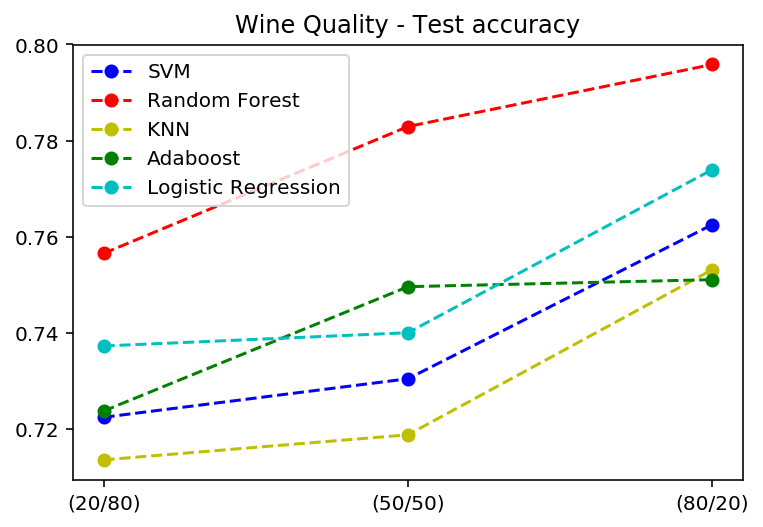

In [74]:
test_svm_list = [test_avg_svm_20,test_avg_svm_50,test_avg_svm_80]
test_rmf_list = [test_avg_rmf_20,test_avg_rmf_50,test_avg_rmf_80]
test_knn_list = [test_avg_knn_20,test_avg_knn_50,test_avg_knn_80]
test_adb_list = [test_avg_adb_20,test_avg_adb_50,test_avg_adb_80]
test_log_list = [test_avg_log_20,test_avg_log_50,test_avg_log_80]

x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,test_svm_list, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,test_rmf_list, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,test_knn_list, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,test_adb_list, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,test_log_list, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Wine Quality - Test accuracy')
plt.show()


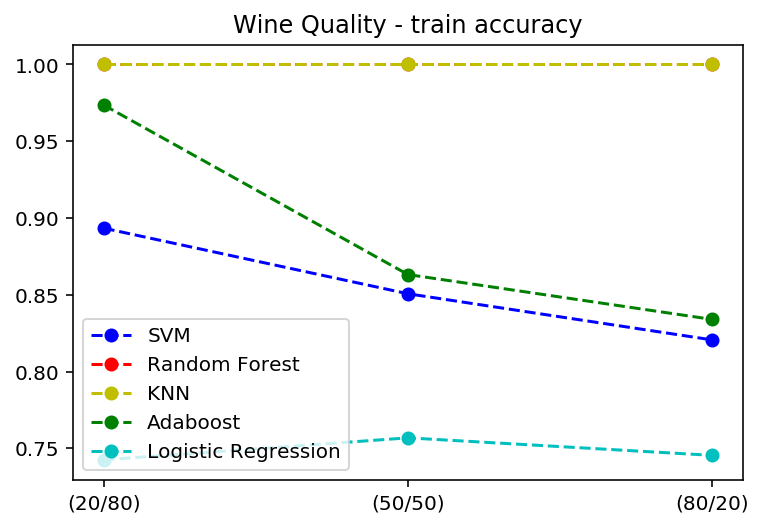

In [75]:
train_svm_list = [train_avg_svm_20,train_avg_svm_50,train_avg_svm_80]
train_rmf_list = [train_avg_rmf_20,train_avg_rmf_50,train_avg_rmf_80]
train_knn_list = [train_avg_knn_20,train_avg_knn_50,train_avg_knn_80]
train_adb_list = [train_avg_adb_20,train_avg_adb_50,train_avg_adb_80]
train_log_list = [train_avg_log_20,train_avg_log_50,train_avg_log_80]

x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,train_svm_list, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,train_rmf_list, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,train_knn_list, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,train_adb_list, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,train_log_list, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Wine Quality - train accuracy')
plt.show()

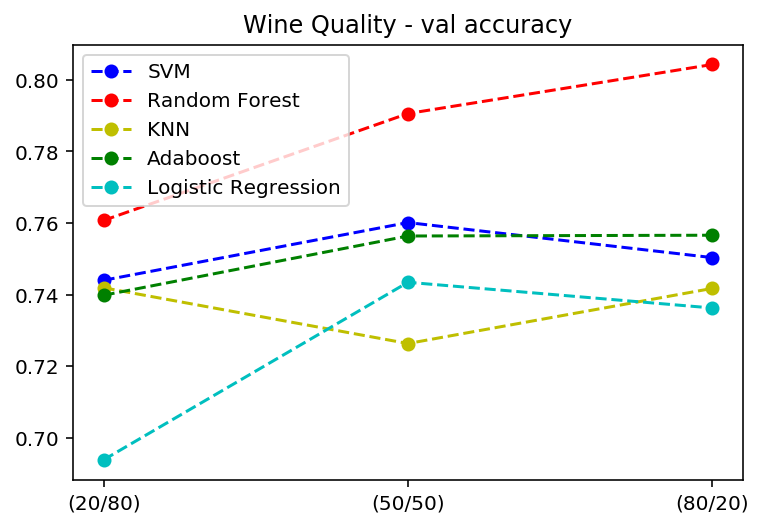

In [76]:
val_svm_list = [val_avg_svm_20,val_avg_svm_50,val_avg_svm_80]
val_rmf_list = [val_avg_rmf_20,val_avg_rmf_50,val_avg_rmf_80]
val_knn_list = [val_avg_knn_20,val_avg_knn_50,val_avg_knn_80]
val_adb_list = [val_avg_adb_20,val_avg_adb_50,val_avg_adb_80]
val_log_list = [val_avg_log_20,val_avg_log_50,val_avg_log_80]

x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,val_svm_list, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,val_rmf_list, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,val_knn_list, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,val_adb_list, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,val_log_list, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Wine Quality - val accuracy')
plt.show()

# DataSet 3: Iris Category

Classifier: SVM

In [77]:
# Partition(20/80)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_svm_20_3,val_avg_svm_20_3,test_avg_svm_20_3 = SVM(Data_3,0.2,C_list)




Trial 1
Best parameter: {'C': 0.1, 'kernel': 'linear'}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'C': 0.01, 'kernel': 'linear'}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 0.991666666667

Trial 3
Best parameter: {'C': 0.1, 'kernel': 'linear'}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 0.997222222222


In [78]:
# Partition(50/50)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_svm_50_3,val_avg_svm_50_3,test_avg_svm_50_3 = SVM(Data_3,0.5,C_list)




Trial 1
Best parameter: {'C': 0.01, 'kernel': 'linear'}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'C': 0.01, 'kernel': 'linear'}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'C': 0.01, 'kernel': 'linear'}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


In [79]:
# Partition(80/20)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_svm_80_3,val_avg_svm_80_3,test_avg_svm_80_3 = SVM(Data_3,0.8,C_list)




Trial 1
Best parameter: {'C': 0.01, 'kernel': 'linear'}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'C': 0.01, 'kernel': 'linear'}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'C': 0.01, 'kernel': 'linear'}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


Classifier: Random Forest

In [80]:
# Partition (20/80)
n_estimator_list = [10,20,50,80,100]
train_avg_rmf_20_3,val_avg_rmf_20_3,test_avg_rmf_20_3 = RMF(Data_3,0.2,n_estimator_list)


Trial 1
Best parameter: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 10}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 0.866666666667

Trial 2
Best parameter: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 0.955555555556


In [81]:
# Partition (50/50)
n_estimator_list = [10,20,50,80,100]
train_avg_rmf_50_3,val_avg_rmf_50_3,test_avg_rmf_50_3 = RMF(Data_3,0.5,n_estimator_list)


Trial 1
Best parameter: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 10}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 10}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 10}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


In [82]:
# Partition (80/20)
n_estimator_list = [10,20,50,80,100]
train_avg_rmf_80_3,val_avg_rmf_80_3,test_avg_rmf_80_3 = RMF(Data_3,0.8,n_estimator_list)


Trial 1
Best parameter: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 10}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 10}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 10}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


Classifier: KNN

In [83]:
# Partition (20/80)
K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]
train_avg_knn_20_3, val_avg_knn_20_3, test_avg_knn_20_3 = KNN(Data_3,0.2,K_list)


Trial 1
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


In [84]:
# Partition (50/50)
K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]
train_avg_knn_50_3, val_avg_knn_50_3, test_avg_knn_50_3 = KNN(Data_3,0.5,K_list)


Trial 1
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


In [85]:
# Partition (80/20)
K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]
train_avg_knn_80_3, val_avg_knn_80_3, test_avg_knn_80_3 = KNN(Data_3,0.8,K_list)


Trial 1
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


Classifier: Adaboost

In [89]:
# Partition (20/80)
learning_rate = [0.1,0.2,0.5,0.8,1]
n_estimator_list = [20,50,80,100]

train_avg_adb_20_3, val_avg_adb_20_3, test_avg_adb_20_3 = ADB(Data_3,0.2,learning_rate,n_estimator_list)


Trial 1
Best parameter: {'learning_rate': 0.1, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'learning_rate': 0.1, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'learning_rate': 0.1, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


In [90]:
# Partition (50/50)
learning_rate = [0.1,0.2,0.5,0.8,1]
n_estimator_list = [20,50,80,100]

train_avg_adb_50_3, val_avg_adb_50_3, test_avg_adb_50_3 = ADB(Data_3,0.5,learning_rate,n_estimator_list)


Trial 1
Best parameter: {'learning_rate': 0.1, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'learning_rate': 0.1, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'learning_rate': 0.1, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


In [91]:
# Partition (80/20)
learning_rate = [0.1,0.2,0.5,0.8,1]
n_estimator_list = [20,50,80,100]

train_avg_adb_80_3, val_avg_adb_80_3, test_avg_adb_80_3 = ADB(Data_3,0.8,learning_rate,n_estimator_list)


Trial 1
Best parameter: {'learning_rate': 0.1, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'learning_rate': 0.1, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'learning_rate': 0.1, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


Classifier: Logistic Regression

In [92]:
# Partition(20/80)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_log_20_3,val_avg_log_20_3,test_avg_log_20_3 = LOG(Data_3,0.2,C_list)


Trial 1
Best parameter: {'C': 10}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'C': 0.1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'C': 0.1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


In [93]:
# Partition(50/50)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_log_50_3,val_avg_log_50_3,test_avg_log_50_3 = LOG(Data_3,0.5,C_list)


Trial 1
Best parameter: {'C': 0.1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'C': 0.1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'C': 0.1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


In [94]:
# Partition(80/20)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_log_80_3,val_avg_log_80_3,test_avg_log_80_3 = LOG(Data_3,0.8,C_list)


Trial 1
Best parameter: {'C': 0.1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 2
Best parameter: {'C': 0.1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Trial 3
Best parameter: {'C': 0.1}
train accuracy is: 1.0
val accuracy is: 1.0
test accuracy is: 1.0

Average train accuracy is: 1.0
Average val accuracy is: 1.0
Average test accuracy is: 1.0


Plot visual representation for Dataset 2

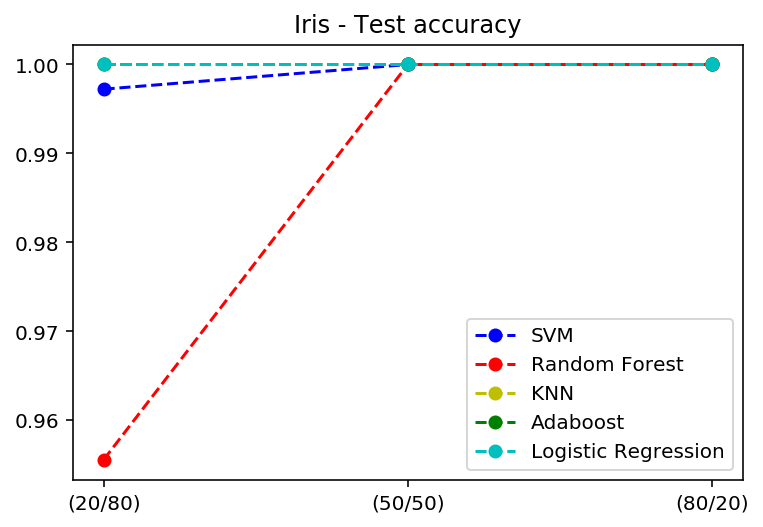

In [95]:
test_svm_list_3 = [test_avg_svm_20_3,test_avg_svm_50_3,test_avg_svm_80_3]
test_rmf_list_3 = [test_avg_rmf_20_3,test_avg_rmf_50_3,test_avg_rmf_80_3]
test_knn_list_3 = [test_avg_knn_20_3,test_avg_knn_50_3,test_avg_knn_80_3]
test_adb_list_3 = [test_avg_adb_20_3,test_avg_adb_50_3,test_avg_adb_80_3]
test_log_list_3 = [test_avg_log_20_3,test_avg_log_50_3,test_avg_log_80_3]

x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,test_svm_list_3, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,test_rmf_list_3, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,test_knn_list_3, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,test_adb_list_3, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,test_log_list_3, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Iris - Test accuracy')
plt.show()

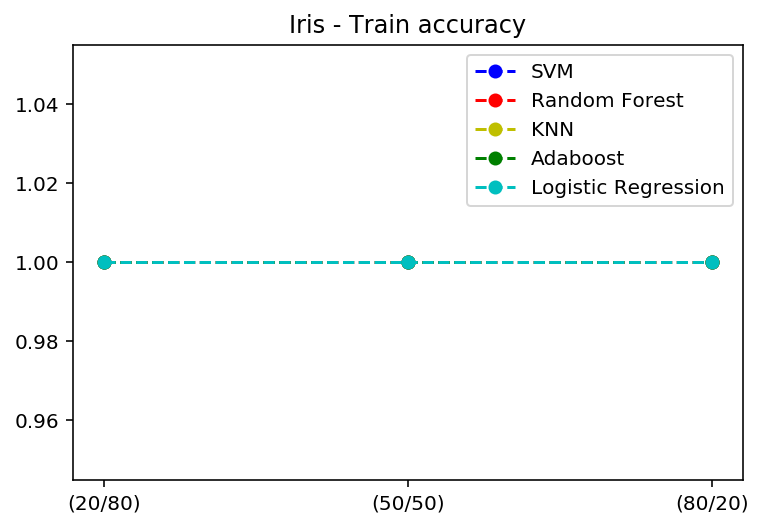

In [96]:
train_svm_list_3 = [train_avg_svm_20_3,train_avg_svm_50_3,train_avg_svm_80_3]
train_rmf_list_3 = [train_avg_rmf_20_3,train_avg_rmf_50_3,train_avg_rmf_80_3]
train_knn_list_3 = [train_avg_knn_20_3,train_avg_knn_50_3,train_avg_knn_80_3]
train_adb_list_3 = [train_avg_adb_20_3,train_avg_adb_50_3,train_avg_adb_80_3]
train_log_list_3 = [train_avg_log_20_3,train_avg_log_50_3,train_avg_log_80_3]

x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,train_svm_list_3, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,train_rmf_list_3, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,train_knn_list_3, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,train_adb_list_3, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,train_log_list_3, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Iris - Train accuracy')
plt.show()

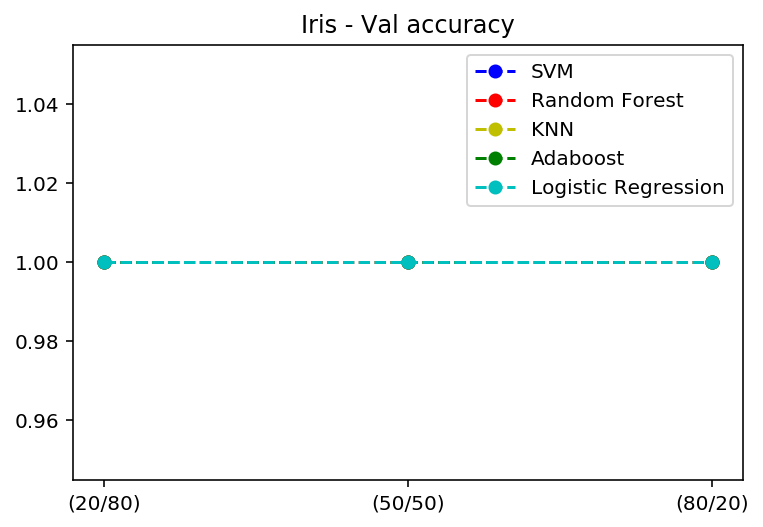

In [97]:
val_svm_list_3 = [val_avg_svm_20_3,val_avg_svm_50_3,val_avg_svm_80_3]
val_rmf_list_3 = [val_avg_rmf_20_3,val_avg_rmf_50_3,val_avg_rmf_80_3]
val_knn_list_3 = [val_avg_knn_20_3,val_avg_knn_50_3,val_avg_knn_80_3]
val_adb_list_3 = [val_avg_adb_20_3,val_avg_adb_50_3,val_avg_adb_80_3]
val_log_list_3 = [val_avg_log_20_3,val_avg_log_50_3,val_avg_log_80_3]

x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,val_svm_list_3, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,val_rmf_list_3, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,val_knn_list_3, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,val_adb_list_3, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,val_log_list_3, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Iris - Val accuracy')
plt.show()

# Dataset 4: Car Evaluation

Classifier: SVM

In [98]:
# Partition(20/80)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_svm_20_4,val_avg_svm_20_4,test_avg_svm_20_4 = SVM(Data_4,0.2,C_list)


Trial 1
Best parameter: {'C': 1000, 'kernel': 'linear'}
train accuracy is: 1.0
val accuracy is: 0.973913043478
test accuracy is: 0.957308248915

Trial 2
Best parameter: {'C': 100, 'kernel': 'rbf'}
train accuracy is: 1.0
val accuracy is: 0.959420289855
test accuracy is: 0.967438494935

Trial 3
Best parameter: {'C': 100, 'kernel': 'rbf'}
train accuracy is: 1.0
val accuracy is: 0.971014492754
test accuracy is: 0.966714905933

Average train accuracy is: 1.0
Average val accuracy is: 0.968115942029
Average test accuracy is: 0.963820549928


In [114]:
# Partition(50/50)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_svm_50_4,val_avg_svm_50_4,test_avg_svm_50_4 = SVM(Data_4,0.5,C_list)


Trial 1
Best parameter: {'C': 100, 'kernel': 'rbf'}
train accuracy is: 1.0
val accuracy is: 0.972190034762
test accuracy is: 0.99537037037

Trial 2
Best parameter: {'C': 100, 'kernel': 'rbf'}
train accuracy is: 1.0
val accuracy is: 0.979142526072
test accuracy is: 0.996527777778

Trial 3
Best parameter: {'C': 10, 'kernel': 'rbf'}
train accuracy is: 1.0
val accuracy is: 0.983777520278
test accuracy is: 0.988425925926

Average train accuracy is: 1.0
Average val accuracy is: 0.978370027037
Average test accuracy is: 0.993441358025


In [100]:
# Partition(80/20)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_svm_80_4,val_avg_svm_80_4,test_avg_svm_80_4 = SVM(Data_4,0.8,C_list)


Trial 1
Best parameter: {'C': 100, 'kernel': 'rbf'}
train accuracy is: 1.0
val accuracy is: 0.994931209269
test accuracy is: 1.0

Trial 2
Best parameter: {'C': 100, 'kernel': 'rbf'}
train accuracy is: 1.0
val accuracy is: 0.996379435192
test accuracy is: 0.994219653179

Trial 3
Best parameter: {'C': 100, 'kernel': 'rbf'}
train accuracy is: 1.0
val accuracy is: 0.986241853729
test accuracy is: 0.99710982659

Average train accuracy is: 1.0
Average val accuracy is: 0.992517499397
Average test accuracy is: 0.99710982659


Classifier: Random Forest

In [101]:
# Partition (20/80)
n_estimator_list = [10,20,50,80,100]
train_avg_rmf_20_4,val_avg_rmf_20_4,test_avg_rmf_20_4 = RMF(Data_4,0.2,n_estimator_list)


Trial 1
Best parameter: {'criterion': 'entropy', 'max_features': 9, 'n_estimators': 50}
train accuracy is: 1.0
val accuracy is: 0.979710144928
test accuracy is: 0.971056439942

Trial 2
Best parameter: {'criterion': 'entropy', 'max_features': 7, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 0.973913043478
test accuracy is: 0.981186685962

Trial 3
Best parameter: {'criterion': 'entropy', 'max_features': 5, 'n_estimators': 80}
train accuracy is: 1.0
val accuracy is: 0.973913043478
test accuracy is: 0.970332850941

Average train accuracy is: 1.0
Average val accuracy is: 0.975845410628
Average test accuracy is: 0.974191992282


In [102]:
# Partition (50/80)
n_estimator_list = [10,20,50,80,100]
train_avg_rmf_50_4,val_avg_rmf_50_4,test_avg_rmf_50_4 = RMF(Data_4,0.5,n_estimator_list)


Trial 1
Best parameter: {'criterion': 'entropy', 'max_features': 14, 'n_estimators': 50}
train accuracy is: 1.0
val accuracy is: 0.980301274623
test accuracy is: 0.993055555556

Trial 2
Best parameter: {'criterion': 'gini', 'max_features': 7, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 0.993047508691
test accuracy is: 0.982638888889

Trial 3
Best parameter: {'criterion': 'entropy', 'max_features': 7, 'n_estimators': 80}
train accuracy is: 1.0
val accuracy is: 0.983777520278
test accuracy is: 0.981481481481

Average train accuracy is: 1.0
Average val accuracy is: 0.985708767864
Average test accuracy is: 0.985725308642


In [103]:
# Partition (80/20)
n_estimator_list = [10,20,50,80,100]
train_avg_rmf_80_4,val_avg_rmf_80_4,test_avg_rmf_80_4 = RMF(Data_4,0.8,n_estimator_list)


Trial 1
Best parameter: {'criterion': 'entropy', 'max_features': 14, 'n_estimators': 10}
train accuracy is: 1.0
val accuracy is: 0.985517740768
test accuracy is: 0.991329479769

Trial 2
Best parameter: {'criterion': 'entropy', 'max_features': 9, 'n_estimators': 20}
train accuracy is: 1.0
val accuracy is: 0.988414192614
test accuracy is: 0.99710982659

Trial 3
Best parameter: {'criterion': 'entropy', 'max_features': 15, 'n_estimators': 100}
train accuracy is: 1.0
val accuracy is: 0.987690079652
test accuracy is: 0.991329479769

Average train accuracy is: 1.0
Average val accuracy is: 0.987207337678
Average test accuracy is: 0.993256262042


In [69]:
# Partition (20/80)
# Run SVM Classifier three times
for i in range(3):
    test_acc = runSVM(Data_4,0.2)
    print("Trial " + str(i+1) + " " + "test accuracy is: " + str(test_acc))

The best paramters: {'C': 0.5, 'kernel': 'linear'}
Train_acc is:0.972482425492
Val_acc is:0.95652173913
Trial 1 test accuracy is: 0.953690303907
The best paramters: {'C': 2, 'kernel': 'linear'}
Train_acc is:0.960869565217
Val_acc is:0.953623188406
Trial 2 test accuracy is: 0.955861070912
The best paramters: {'C': 0.5, 'kernel': 'linear'}
Train_acc is:0.969539628568
Val_acc is:0.953623188406
Trial 3 test accuracy is: 0.9500723589


Classifier: KNN

In [104]:
# Partition (20/80)
K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]
train_avg_knn_20_4, val_avg_knn_20_4, test_avg_knn_20_4 = KNN(Data_4,0.2,K_list)


Trial 1
Best parameter: {'n_neighbors': 5}
train accuracy is: 1.0
val accuracy is: 0.947826086957
test accuracy is: 0.936324167873

Trial 2
Best parameter: {'n_neighbors': 7}
train accuracy is: 1.0
val accuracy is: 0.930434782609
test accuracy is: 0.928364688857

Trial 3
Best parameter: {'n_neighbors': 7}
train accuracy is: 1.0
val accuracy is: 0.927536231884
test accuracy is: 0.934153400868

Average train accuracy is: 1.0
Average val accuracy is: 0.935265700483
Average test accuracy is: 0.932947419199


In [105]:
# Partition (50/50)
K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]
train_avg_knn_50_4, val_avg_knn_50_4, test_avg_knn_50_4 = KNN(Data_4,0.5,K_list)


Trial 1
Best parameter: {'n_neighbors': 3}
train accuracy is: 1.0
val accuracy is: 0.942062572422
test accuracy is: 0.944444444444

Trial 2
Best parameter: {'n_neighbors': 5}
train accuracy is: 1.0
val accuracy is: 0.939745075319
test accuracy is: 0.951388888889

Trial 3
Best parameter: {'n_neighbors': 3}
train accuracy is: 1.0
val accuracy is: 0.946697566628
test accuracy is: 0.924768518519

Average train accuracy is: 1.0
Average val accuracy is: 0.942835071456
Average test accuracy is: 0.940200617284


In [106]:
# Partition (80/20)
K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]
train_avg_knn_80_4, val_avg_knn_80_4, test_avg_knn_80_4 = KNN(Data_4,0.8,K_list)


Trial 1
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 0.956553222303
test accuracy is: 0.939306358382

Trial 2
Best parameter: {'n_neighbors': 5}
train accuracy is: 1.0
val accuracy is: 0.955829109341
test accuracy is: 0.933526011561

Trial 3
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 0.947139753802
test accuracy is: 0.956647398844

Average train accuracy is: 1.0
Average val accuracy is: 0.953174028482
Average test accuracy is: 0.943159922929


Classifier: Adaboost

In [107]:
# Partition (20/80)
learning_rate = [0.1,0.2,0.5,0.8,1]
n_estimator_list = [20,50,80,100]

train_avg_adb_20_4, val_avg_adb_20_4, test_avg_adb_20_4 = ADB(Data_4,0.2,learning_rate,n_estimator_list)


Trial 1
Best parameter: {'learning_rate': 1, 'n_estimators': 80}
train accuracy is: 1.0
val accuracy is: 0.985507246377
test accuracy is: 0.986975397974

Trial 2
Best parameter: {'learning_rate': 0.5, 'n_estimators': 20}
train accuracy is: 0.996376811594
val accuracy is: 0.973913043478
test accuracy is: 0.978292329957

Trial 3
Best parameter: {'learning_rate': 0.8, 'n_estimators': 20}
train accuracy is: 0.995652135862
val accuracy is: 0.976811594203
test accuracy is: 0.980463096961

Average train accuracy is: 0.997342982485
Average val accuracy is: 0.978743961353
Average test accuracy is: 0.981910274964


In [108]:
# Partition (50/50)
learning_rate = [0.1,0.2,0.5,0.8,1]
n_estimator_list = [20,50,80,100]

train_avg_adb_50_4, val_avg_adb_50_4, test_avg_adb_50_4 = ADB(Data_4,0.5,learning_rate,n_estimator_list)


Trial 1
Best parameter: {'learning_rate': 0.8, 'n_estimators': 20}
train accuracy is: 0.991019097203
val accuracy is: 0.982618771727
test accuracy is: 0.986111111111

Trial 2
Best parameter: {'learning_rate': 0.5, 'n_estimators': 20}
train accuracy is: 0.993048508271
val accuracy is: 0.981460023175
test accuracy is: 0.987268518519

Trial 3
Best parameter: {'learning_rate': 0.8, 'n_estimators': 80}
train accuracy is: 0.99188908436
val accuracy is: 0.987253765933
test accuracy is: 0.984953703704

Average train accuracy is: 0.991985563278
Average val accuracy is: 0.983777520278
Average test accuracy is: 0.986111111111


In [109]:
# Partition (80/20)
learning_rate = [0.1,0.2,0.5,0.8,1]
n_estimator_list = [20,50,80,100]

train_avg_adb_80_4, val_avg_adb_80_4, test_avg_adb_80_4 = ADB(Data_4,0.8,learning_rate,n_estimator_list)


Trial 1
Best parameter: {'learning_rate': 0.5, 'n_estimators': 100}
train accuracy is: 0.991310249852
val accuracy is: 0.986241853729
test accuracy is: 0.994219653179

Trial 2
Best parameter: {'learning_rate': 0.5, 'n_estimators': 100}
train accuracy is: 0.992939864909
val accuracy is: 0.990586531499
test accuracy is: 0.985549132948

Trial 3
Best parameter: {'learning_rate': 0.5, 'n_estimators': 80}
train accuracy is: 0.990948255938
val accuracy is: 0.990586531499
test accuracy is: 0.991329479769

Average train accuracy is: 0.991732790233
Average val accuracy is: 0.989138305576
Average test accuracy is: 0.990366088632


Classifier: Logistic Regression

In [110]:
# Partition(20/80)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_log_20_4,val_avg_log_20_4,test_avg_log_20_4 = LOG(Data_4,0.2,C_list)


Trial 1
Best parameter: {'C': 10}
train accuracy is: 0.973906440795
val accuracy is: 0.947826086957
test accuracy is: 0.968162083936

Trial 2
Best parameter: {'C': 100}
train accuracy is: 0.966641023049
val accuracy is: 0.944927536232
test accuracy is: 0.960926193922

Trial 3
Best parameter: {'C': 10}
train accuracy is: 0.978266869514
val accuracy is: 0.947826086957
test accuracy is: 0.956584659913

Average train accuracy is: 0.972938111119
Average val accuracy is: 0.946859903382
Average test accuracy is: 0.961890979257


In [111]:
# Partition(50/50)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_log_50_4,val_avg_log_50_4,test_avg_log_50_4 = LOG(Data_4,0.5,C_list)


Trial 1
Best parameter: {'C': 10}
train accuracy is: 0.9611804749
val accuracy is: 0.960602549247
test accuracy is: 0.969907407407

Trial 2
Best parameter: {'C': 100}
train accuracy is: 0.972189959995
val accuracy is: 0.966396292005
test accuracy is: 0.961805555556

Trial 3
Best parameter: {'C': 10}
train accuracy is: 0.977405394525
val accuracy is: 0.964078794902
test accuracy is: 0.958333333333

Average train accuracy is: 0.970258609807
Average val accuracy is: 0.963692545384
Average test accuracy is: 0.963348765432


In [116]:
# Partition(80/20)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_log_80_4,val_avg_log_80_4,test_avg_log_80_4 = LOG(Data_4,0.8,C_list)


Trial 1
Best parameter: {'C': 100}
train accuracy is: 0.963793266057
val accuracy is: 0.961622013034
test accuracy is: 0.973988439306

Trial 2
Best parameter: {'C': 10}
train accuracy is: 0.966327951659
val accuracy is: 0.963794351919
test accuracy is: 0.968208092486

Trial 3
Best parameter: {'C': 100}
train accuracy is: 0.96958565186
val accuracy is: 0.963794351919
test accuracy is: 0.965317919075

Average train accuracy is: 0.966568956525
Average val accuracy is: 0.963070238957
Average test accuracy is: 0.969171483622


Plot visual representation for Dataset 4

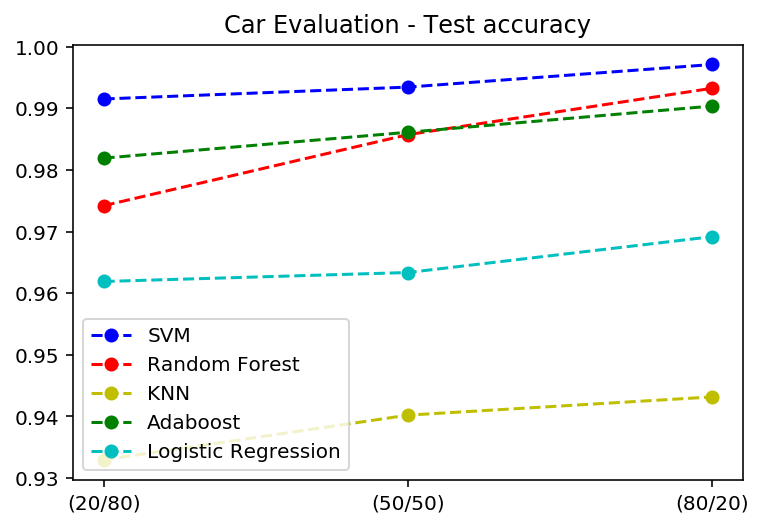

In [117]:
test_svm_list_4 = [test_avg_svm_20_4,test_avg_svm_50_4,test_avg_svm_80_4]
test_rmf_list_4 = [test_avg_rmf_20_4,test_avg_rmf_50_4,test_avg_rmf_80_4]
test_knn_list_4 = [test_avg_knn_20_4,test_avg_knn_50_4,test_avg_knn_80_4]
test_adb_list_4 = [test_avg_adb_20_4,test_avg_adb_50_4,test_avg_adb_80_4]
test_log_list_4 = [test_avg_log_20_4,test_avg_log_50_4,test_avg_log_80_4]

x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,test_svm_list_4, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,test_rmf_list_4, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,test_knn_list_4, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,test_adb_list_4, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,test_log_list_4, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Car Evaluation - Test accuracy')
plt.show()

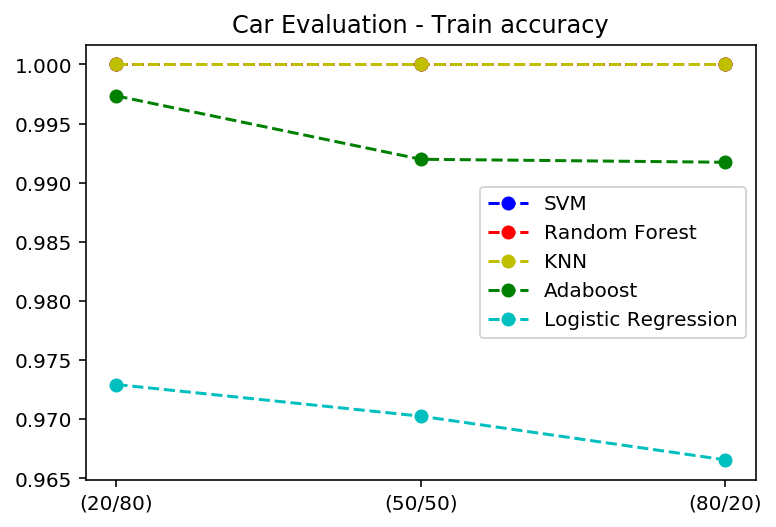

In [118]:
train_svm_list_4 = [train_avg_svm_20_4,train_avg_svm_50_4,train_avg_svm_80_4]
train_rmf_list_4 = [train_avg_rmf_20_4,train_avg_rmf_50_4,train_avg_rmf_80_4]
train_knn_list_4 = [train_avg_knn_20_4,train_avg_knn_50_4,train_avg_knn_80_4]
train_adb_list_4 = [train_avg_adb_20_4,train_avg_adb_50_4,train_avg_adb_80_4]
train_log_list_4 = [train_avg_log_20_4,train_avg_log_50_4,train_avg_log_80_4]

x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,train_svm_list_4, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,train_rmf_list_4, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,train_knn_list_4, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,train_adb_list_4, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,train_log_list_4, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Car Evaluation - Train accuracy')
plt.show()

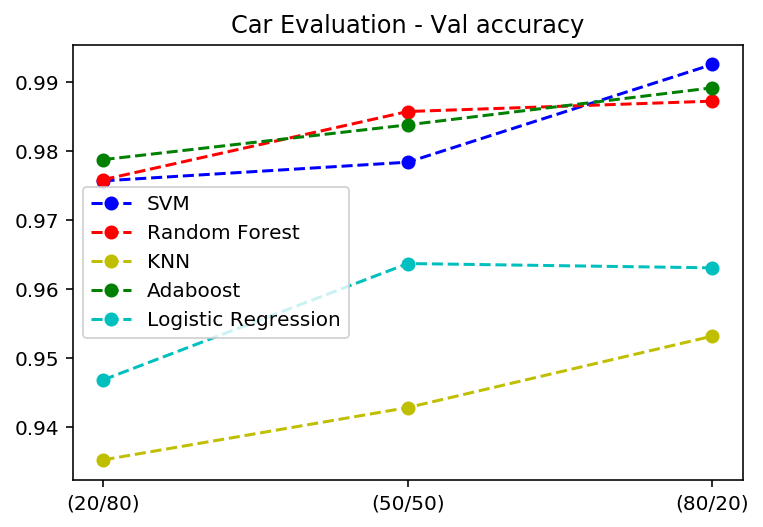

In [119]:
val_svm_list_4 = [val_avg_svm_20_4,val_avg_svm_50_4,val_avg_svm_80_4]
val_rmf_list_4 = [val_avg_rmf_20_4,val_avg_rmf_50_4,val_avg_rmf_80_4]
val_knn_list_4 = [val_avg_knn_20_4,val_avg_knn_50_4,val_avg_knn_80_4]
val_adb_list_4 = [val_avg_adb_20_4,val_avg_adb_50_4,val_avg_adb_80_4]
val_log_list_4 = [val_avg_log_20_4,val_avg_log_50_4,val_avg_log_80_4]

x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,val_svm_list_4, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,val_rmf_list_4, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,val_knn_list_4, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,val_adb_list_4, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,val_log_list_4, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Car Evaluation - Val accuracy')
plt.show()

In [14]:
test_svm_list = [0.72239,0.73041,0.7625]
test_rmf_list = [0.75651,0.78291,0.7958333]
test_knn_list = [0.71354,0.71875,0.753125]
test_adb_list = [0.72369,0.74958,0.75104]
test_log_list = [0.73723,0.74,0.773958]

test_svm_list_3 = [0.99722,1,1]
test_rmf_list_3 = [0.95555,1,1]
test_knn_list_3 = [1,1,1]
test_adb_list_3 = [1,1,1]
test_log_list_3 = [1,1,1]

test_svm_list_4 = [0.96382,0.99344,0.99710]
test_rmf_list_4 = [0.97419,0.9857253,0.993256]
test_knn_list_4 = [0.93294,0.940200,0.94315]
test_adb_list_4 = [0.9819102,0.98611,0.99036]
test_log_list_4 = [0.96189,0.96334,0.96917]

test_svm_list_5 = [0.73333,0.746666,0.80000]
test_rmf_list_5 = [0.69999,0.713,0.75]
test_knn_list_5 = [0.6625,0.7066,0.7333]
test_adb_list_5 = [0.7375,0.7600,0.7999]
test_log_list_5 = [0.7083333,0.72000,0.75]

In [ ]:
# svm_col
# test_svm_list
# test_svm_list_3
# test_svm_list_4
# test_svm_list_5

In [16]:
svm_col_20 = [test_svm_list[0],test_svm_list_3[0],test_svm_list_4[0],test_svm_list_5[0]]
svm_col_50 = [test_svm_list[1],test_svm_list_3[1],test_svm_list_4[1],test_svm_list_5[1]]
svm_col_80 = [test_svm_list[2],test_svm_list_3[2],test_svm_list_4[2],test_svm_list_5[2]]

rmf_col_20 = [test_rmf_list[0],test_rmf_list_3[0],test_rmf_list_4[0],test_rmf_list_5[0]]
rmf_col_50 = [test_rmf_list[1],test_rmf_list_3[1],test_rmf_list_4[1],test_rmf_list_5[1]]
rmf_col_80 = [test_rmf_list[2],test_rmf_list_3[2],test_rmf_list_4[2],test_rmf_list_5[2]]

knn_col_20 = [test_knn_list[0],test_knn_list_3[0],test_knn_list_4[0],test_knn_list_5[0]]
knn_col_50 = [test_knn_list[1],test_knn_list_3[1],test_knn_list_4[1],test_knn_list_5[1]]
knn_col_80 = [test_knn_list[2],test_knn_list_3[2],test_knn_list_4[2],test_knn_list_5[2]]

adb_col_20 = [test_adb_list[0],test_adb_list_3[0],test_adb_list_4[0],test_adb_list_5[0]]
adb_col_50 = [test_adb_list[1],test_adb_list_3[1],test_adb_list_4[1],test_adb_list_5[1]]
adb_col_80 = [test_adb_list[2],test_adb_list_3[2],test_adb_list_4[2],test_adb_list_5[2]]

log_col_20 = [test_log_list[0],test_log_list_3[0],test_log_list_4[0],test_log_list_5[0]]
log_col_50 = [test_log_list[1],test_log_list_3[1],test_log_list_4[1],test_log_list_5[1]]
log_col_80 = [test_log_list[2],test_log_list_3[2],test_log_list_4[2],test_log_list_5[2]]




In [32]:
import statistics
svm_20 = statistics.mean(svm_col_20)
svm_50 = statistics.mean(svm_col_50)
svm_80 = statistics.mean(svm_col_80)

rmf_20 = statistics.mean(rmf_col_20)
rmf_50 = statistics.mean(rmf_col_50)
rmf_80 = statistics.mean(rmf_col_80)

knn_20 = statistics.mean(knn_col_20)
knn_50 = statistics.mean(knn_col_50)
knn_80 = statistics.mean(knn_col_80)

adb_20 = statistics.mean(adb_col_20)
adb_50 = statistics.mean(adb_col_50)
adb_80 = statistics.mean(adb_col_80)

log_20 = statistics.mean(log_col_20)
log_50 = statistics.mean(log_col_50)
log_80 = statistics.mean(log_col_80)


p28 = [svm_20,rmf_20,knn_20,adb_20,log_20]
p55 = [svm_50,rmf_50,knn_50,adb_50,log_50]
p82 = [svm_80,rmf_80,knn_80,adb_80,log_80]

l1 = [svm_20,svm_50,svm_80]
l2 = [rmf_20,rmf_50,rmf_80]
l3 = [knn_20,knn_50,knn_80]
l4 = [adb_20,adb_50,adb_80]
l5 = [log_20,log_50,log_80]

In [28]:
clf = ['SVM','RMF','KNN','ADB','LOG']
D = { '20/80':p28, '50/50':p55, '80/20':p82}

In [30]:
compare = pd.DataFrame(D)
compare.insert(0,'Classifier',clf)
compare

,Classifier,20/80,50/50,80/20
0,SVM,0.854190,0.867629,0.889900
1,RMF,0.846560,0.870409,0.884772
2,KNN,0.827245,0.841387,0.857394
3,ADB,0.860775,0.873923,0.885325
4,LOG,0.851863,0.855835,0.873282


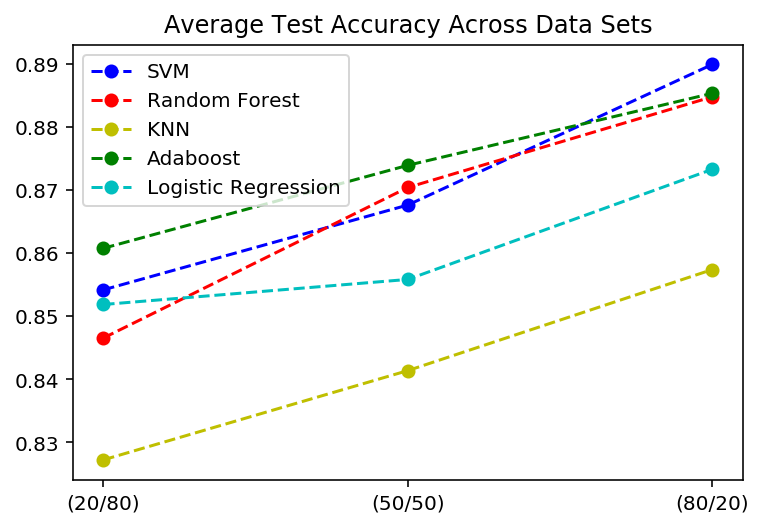

In [33]:
x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,l1, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,l2, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,l3, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,l4, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,l5, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Average Test Accuracy Across Data Sets')
plt.show()